In [2]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

'''
huml - длина плечевой кости
humw - диаметр плечевой кости
ulnal - длина локтевой кости
ulnaw - диаметр локтевой кости
feml - длина бедренной кости
femw - диаметр бедренной кости
tibl - длина кости между бедром и цевкой в ноге
tibw - диаметр кости между бедром и цевкой в ноге
tarl - длина цевки;одна из костей ноги птиц, расположенная между голенью и пальцами
tarw - диаметр цевки

Перед нами стоит задача классификации, необходимо исследовать взаимосвязь между
размерами костей и экологических групп птиц и распознать экологическую группу по форме костей.

Экологические группы:

-Swimming birds (Водоплавающие птицы)

-Wading birds (Болотные птицы)

-Terrestrial birds (Наземные птицы)

-Raptors (Хищники)

-Scansorial birds (Птицы приспособленные к лазанью)

-Singing birds (Поющие птицы)

SW: Swimming Birds
W: Wading Birds
T: Terrestrial Birds
R: Raptors
P: Scansorial Birds
SO: Singing Birds

'''
pass

In [3]:
data = pd.read_csv('bird.csv')
data.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [4]:
'Возвращает размерность файла'
pass
data.shape

(420, 12)

In [5]:
'''
Описательная статистика: мат. ожидание, дисперсия, max, min
Исключает значение NaN
'''
pass
data.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000483E128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001308CB00>]], dtype=object)

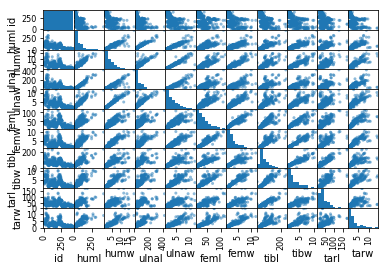

In [6]:
'Диаграмма рассеяния - коррелированность данных'
pd.plotting.scatter_matrix(data)

In [7]:
'Колонки с не численными признаками'
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print (categorical_columns)

['type']


In [8]:
'Названия столбцов с численными значениями'
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(numerical_columns)

['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']


In [9]:
'Средние значения'
data.median(axis=0)

id       209.500
huml      44.180
humw       3.500
ulnal     43.710
ulnaw      2.945
feml      31.130
femw       2.520
tibl      52.120
tibw       2.490
tarl      31.740
tarw       2.230
dtype: float64

In [10]:
'Количество значений в столбце, содержащим численные данные'
data[numerical_columns].count(axis = 0)

id       420
huml     419
humw     419
ulnal    417
ulnaw    418
feml     418
femw     419
tibl     418
tibw     419
tarl     419
tarw     419
dtype: int64

In [11]:
'Количество значений в столбце, содержащим категориальные данные'
data[categorical_columns].count(axis = 0)

type    420
dtype: int64

In [12]:
'''
Убираем пропущенные значения
'''
data = data.fillna(data.median(axis = 0), axis = 0)

In [13]:
data[numerical_columns].count(axis = 0)

id       420
huml     420
humw     420
ulnal    420
ulnaw    420
feml     420
femw     420
tibl     420
tibw     420
tarl     420
tarw     420
dtype: int64

In [14]:
data[categorical_columns].count(axis = 0)

type    420
dtype: int64

In [15]:
'Не бинарные столбцы в нашем случае равны категориальным'
data_nonbinary = pd.get_dummies(data[categorical_columns])
print(data_nonbinary.columns)

Index([u'type_P', u'type_R', u'type_SO', u'type_SW', u'type_T', u'type_W'], dtype='object')


In [16]:
'Нормализуем наши данные, если они масштабированы'

data_numerical = data[numerical_columns]
data_numerical.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,209.500000,64.601762,4.368500,68.933905,3.594143,36.845071,3.219214,64.603095,3.180690,39.212143,2.928357
std,121.387808,53.779546,2.851524,58.613103,2.181985,19.935272,2.021455,37.757629,2.078617,23.159515,2.183330
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.205000,2.190000,28.132500,1.870000,21.332500,1.717500,36.472500,1.567500,23.042500,1.427500
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.220000,5.805000,97.205000,4.770000,47.100000,4.122500,82.870000,4.252500,50.155000,3.490000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [17]:
'Размерность результирующей таблицы'
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(420, 17)


In [18]:
data

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type_P,type_R,type_SO,type_SW,type_T,type_W
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,0,0,0,1,0,0
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,0,0,0,1,0,0
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,0,0,0,1,0,0
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,0,0,0,1,0,0
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,0,0,0,1,0,0
5,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,0,0,0,1,0,0
6,6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,0,0,0,1,0,0
7,7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,0,0,0,1,0,0
8,8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,0,0,0,1,0,0
9,9,145.00,10.42,144.00,7.05,70.96,7.44,120.00,7.31,78.67,6.34,0,0,0,1,0,0


In [19]:
X = data.drop((['id','type_P','type_R','type_SO','type_SW','type_T','type_W']), axis = 1) # выбрасываем столбец
Y = data[['type_P','type_R','type_SO','type_SW','type_T','type_W']]
feature_names = X.columns

In [20]:
X.columns

Index([u'huml', u'humw', u'ulnal', u'ulnaw', u'feml', u'femw', u'tibl',
       u'tibw', u'tarl', u'tarw'],
      dtype='object')

In [21]:
Y.columns

Index([u'type_P', u'type_R', u'type_SO', u'type_SW', u'type_T', u'type_W'], dtype='object')

In [22]:
print(X.shape)
print(Y.shape)
N, d = X.shape

(420, 10)
(420, 6)


In [23]:
type(Y)

pandas.core.frame.DataFrame

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(294, 126)


In [25]:
294+126

420

In [26]:
'''Метод k ближайших соседей'''
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [27]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_train != Y_train_predict)
err_test  = np.mean(Y_test  != Y_test_predict)

#Err_test - ошибка 

print(err_train, err_test)

(type_P     0.034014
type_R     0.051020
type_SO    0.037415
type_SW    0.068027
type_T     0.037415
type_W     0.085034
dtype: float64, type_P     0.047619
type_R     0.007937
type_SO    0.023810
type_SW    0.158730
type_T     0.015873
type_W     0.150794
dtype: float64)


In [28]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_P'], Y_test_predict[:,0]))

[[113   2]
 [  4   7]]


In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_R'], Y_test_predict[:,1]))

[[116   0]
 [  1   9]]


In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_SO'], Y_test_predict[:,2]))

[[83  3]
 [ 0 40]]


In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_SW'], Y_test_predict[:,3]))

[[80  1]
 [19 26]]


In [32]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_T'], Y_test_predict[:,4]))

[[120   0]
 [  2   4]]


In [33]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test['type_W'], Y_test_predict[:,5]))

[[104   8]
 [ 11   3]]


In [34]:
#Подбор параметров
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.18027210884353739, 1)


In [35]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

#Очень странно, ошибка нулевая получается. Слишком великолепные данные???

(type_P     0.0
type_R     0.0
type_SO    0.0
type_SW    0.0
type_T     0.0
type_W     0.0
dtype: float64, type_P     0.031746
type_R     0.015873
type_SO    0.023810
type_SW    0.103175
type_T     0.023810
type_W     0.103175
dtype: float64)


In [36]:
#Random forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))

print(err_train, err_test)

(type_P     0.0
type_R     0.0
type_SO    0.0
type_SW    0.0
type_T     0.0
type_W     0.0
dtype: float64, type_P     0.031746
type_R     0.047619
type_SO    0.023810
type_SW    0.134921
type_T     0.015873
type_W     0.087302
dtype: float64)


In [37]:
#Значимость признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature ' huml' (0.211953)
 2. feature 'ulnal' (0.109170)
 3. feature ' feml' (0.107310)
 4. feature ' humw' (0.105662)
 5. feature 'ulnaw' (0.089667)
 6. feature ' tarw' (0.085583)
 7. feature ' tarl' (0.083542)
 8. feature ' tibl' (0.073773)
 9. feature ' femw' (0.071011)
10. feature ' tibw' (0.062328)


In [38]:
feature_names[[1,0,1]]

Index([u'humw', u'huml', u'humw'], dtype='object')

(-1, 10)

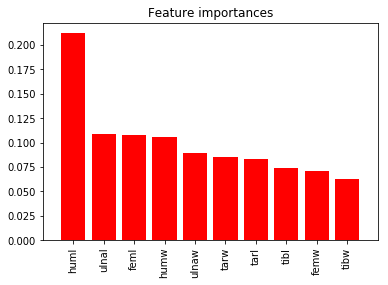

In [39]:
d_first = 10
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

In [40]:
#Extremely Randomized Trees
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, Y_train)

err_train = np.mean(Y_train != ert.predict(X_train))
err_test  = np.mean(Y_test  != ert.predict(X_test))

print(err_train, err_test)

(type_P     0.0
type_R     0.0
type_SO    0.0
type_SW    0.0
type_T     0.0
type_W     0.0
dtype: float64, type_P     0.039683
type_R     0.031746
type_SO    0.015873
type_SW    0.111111
type_T     0.015873
type_W     0.087302
dtype: float64)


<BR><big><strong>Домашняя работа №2</strong></big></BR>

In [41]:
X = data.drop((['id','type_P','type_R','type_SO','type_SW','type_T','type_W']), axis = 1) # выбрасываем столбец
Y = data[['type_SW']]

<br>Мы построим НС для предсказания Swimming birds (Водоплавающие птицы)</br>

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
N_test, _ = X_test.shape

In [64]:
from sklearn.neural_network import MLPClassifier

<br>Для начала мы проанализируем как параметр регуляризации влияет на ошибку. Для этого мы рассмотрим однослойную и двухслойную НС со скрытыми полями, причём если это двухслойная сеть,в каждом поле одинаковое количество нейронов. <br>

Ошибка на обучающейся выборке = 0.132653061224
Ошибка на тестовой выборке = 0.214285714286
Ошибка на обучающейся выборке = 0.139455782313
Ошибка на тестовой выборке = 0.222222222222
Ошибка на обучающейся выборке = 0.241496598639
Ошибка на тестовой выборке = 0.357142857143
Ошибка на обучающейся выборке = 0.241496598639
Ошибка на тестовой выборке = 0.357142857143


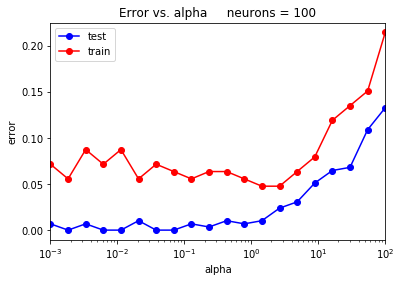

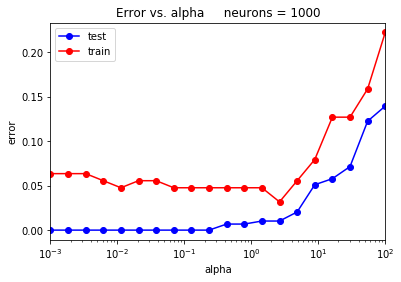

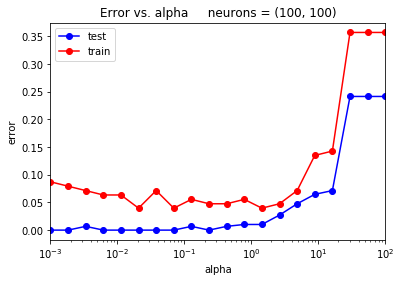

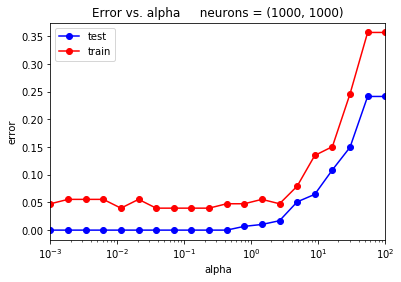

In [67]:
alpha_arr = np.logspace(-3, 2, 20)
neuron_arr = [(100),(200),(20,20),(1000),(100,100),(1000,1000)]
i = 1
max_error = []
for neuron in neuron_arr:
    test_err = []
    train_err = []
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = neuron, 
                                  solver = 'lbfgs', activation = 'logistic')
        mlp_model.fit(X_train, Y_train)

        Y_train_pred = mlp_model.predict(X_train)
        Y_test_pred = mlp_model.predict(X_test)
        train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
        test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
        
    print('Ошибка на обучающейся выборке = ' + str(np.mean(Y_train.values.ravel() != Y_train_pred)))
    print('Ошибка на тестовой выборке = ' + str(np.mean(Y_test.values.ravel() != Y_test_pred)))
    
    max_error.append([np.max(train_err),np.max(test_err)])
    
    plt.figure(i)    
    plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
    plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
    plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
    plt.title('Error vs. alpha' + '     neurons = ' + str(neuron))
    plt.xlabel('alpha')
    plt.ylabel('error')
    plt.legend()
    i = i + 1
    pass

<br>Теперь исследуем как количество нейронов влияет на ошибку</br>

Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.047619047619
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0634920634921
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0555555555556
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0555555555556
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0634920634921
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0555555555556
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0634920634921
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0555555555556
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.0396825396825
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.047619047619
Ошибка на обучающейся выборке = 0.0
Ошибка на тестовой выборке = 0.047619047619
Ошибка на обучающейся выборке = 0.00680272108844
Ошибка на тестовой выборке = 0.047619047619
Ошибка на обучающей

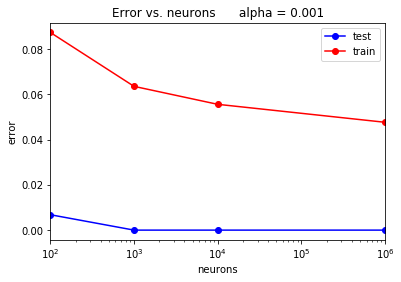

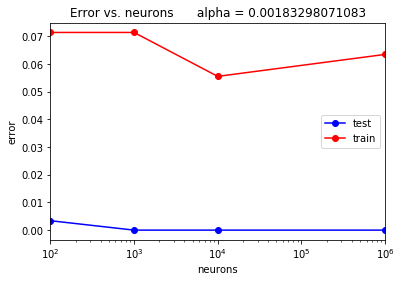

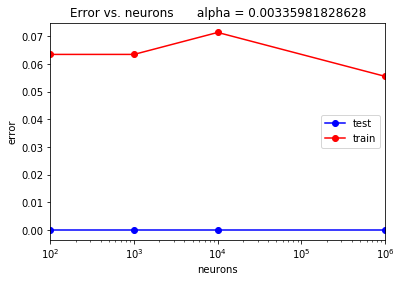

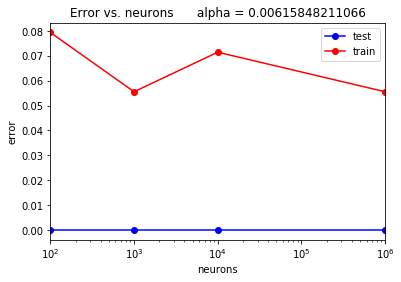

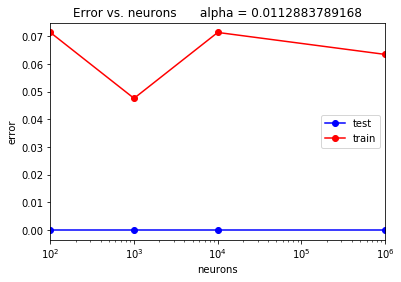

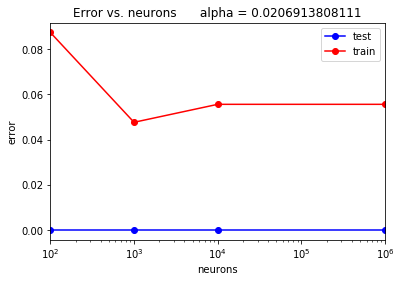

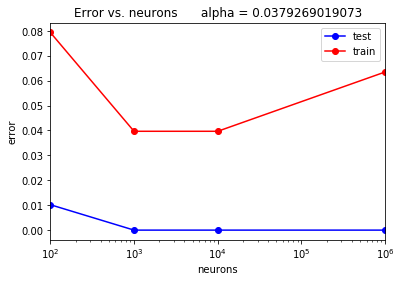

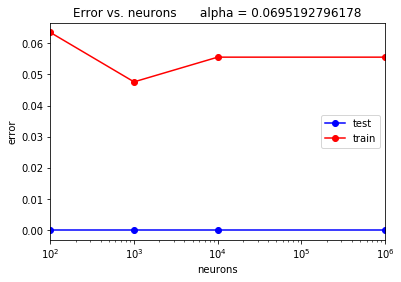

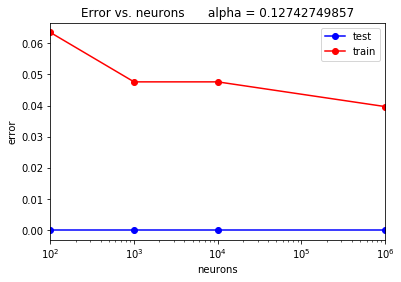

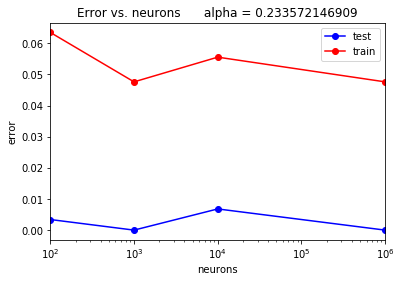

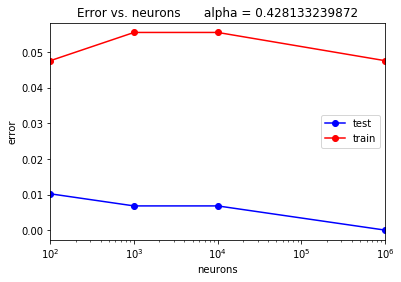

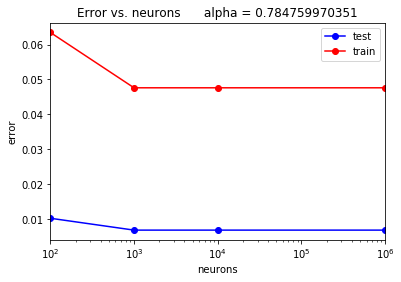

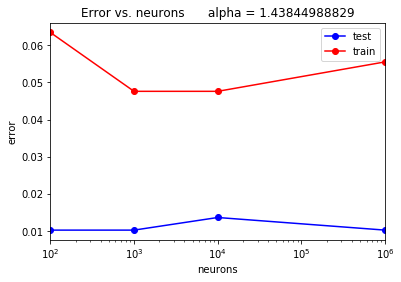

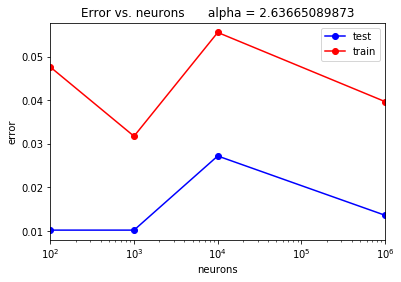

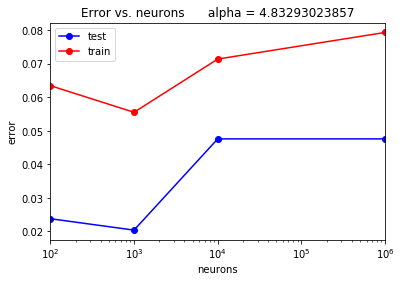

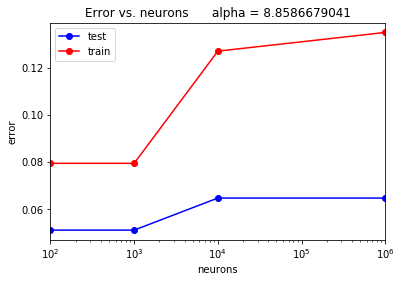

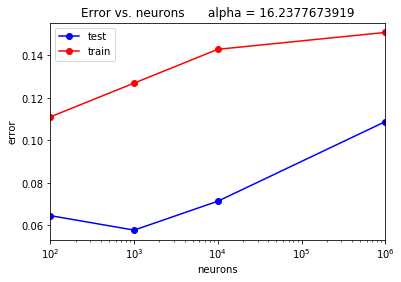

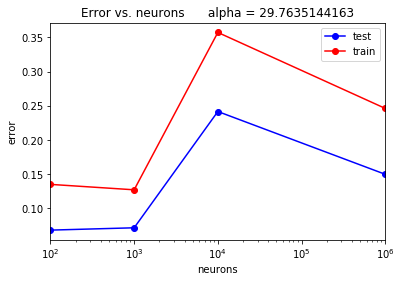

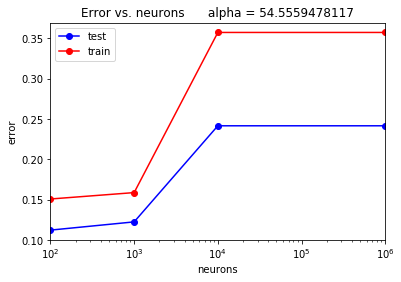

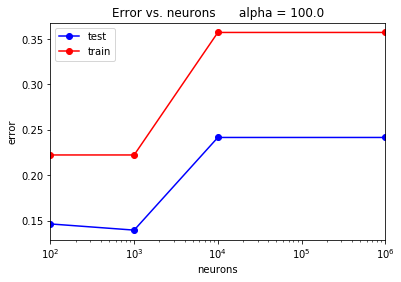

In [68]:
nr = (100,1000,10000,1000000) #Перемножили количество нейронов для наглядности
max_error_n = []
i = 1
for alpha in alpha_arr:
    test_err = []
    train_err = []
    for neuron in neuron_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = neuron, 
                                  solver = 'lbfgs', activation = 'logistic')
        mlp_model.fit(X_train, Y_train)

        Y_train_pred = mlp_model.predict(X_train)
        Y_test_pred = mlp_model.predict(X_test)
        train_err.append(np.mean(Y_train.values.ravel() != Y_train_pred))
        test_err.append(np.mean(Y_test.values.ravel() != Y_test_pred))
    
    print('Ошибка на обучающейся выборке = ' + str(np.mean(Y_train.values.ravel() != Y_train_pred)))
    print('Ошибка на тестовой выборке = ' + str(np.mean(Y_test.values.ravel() != Y_test_pred)))
    
    max_error_n.append([np.max(train_err),np.max(test_err)])
    
    plt.figure(i)  
    plt.semilogx(nr, train_err, 'b-o', label = 'test')
    plt.semilogx(nr, test_err, 'r-o', label = 'train')
    plt.xlim([np.min(nr), np.max(nr)])
    plt.title('Error vs. neurons' + '      alpha = ' + str(alpha))
    plt.xlabel('neurons')
    plt.ylabel('error')
    plt.legend()
    i=i+1
    pass

In [70]:
for err in max_error:
    print(err)

[0.1326530612244898, 0.21428571428571427]
[0.13945578231292516, 0.22222222222222221]
[0.24149659863945577, 0.35714285714285715]
[0.24149659863945577, 0.35714285714285715]
